# Library Imports

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Import Machine Learning Algorithms
from sklearn.model_selection import train_test_split  # Split data into training and testing sets for model evaluation
from sklearn.linear_model import LogisticRegression  # Logistic Regression for classification tasks
from sklearn.neighbors import KNeighborsClassifier  # KNN for classification

# Import Ensemble Learning Algorithms (combining multiple models for better performance)
from sklearn.ensemble import RandomForestClassifier  # Random Forest for robust classification
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting for decision tree-based learning with improved accuracy

# Evaluation Metrics (assessing model performance)
from sklearn.metrics import confusion_matrix  # Visualize model predictions vs. true labels
from sklearn.metrics import accuracy_score, recall_score, f1_score  # Calculate common performance metrics



# Load the dataset

In [32]:
df = pd.read_csv
df = pd.read_csv('diabetes.csv')

In [46]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Dataset Description

In [41]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#basic information about the datset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Quality Analysis


In [6]:
# Calculate the number of missing values in each column 
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
# Counting the number of duplicated rows 
df.duplicated().sum()

0

# Data Visualization


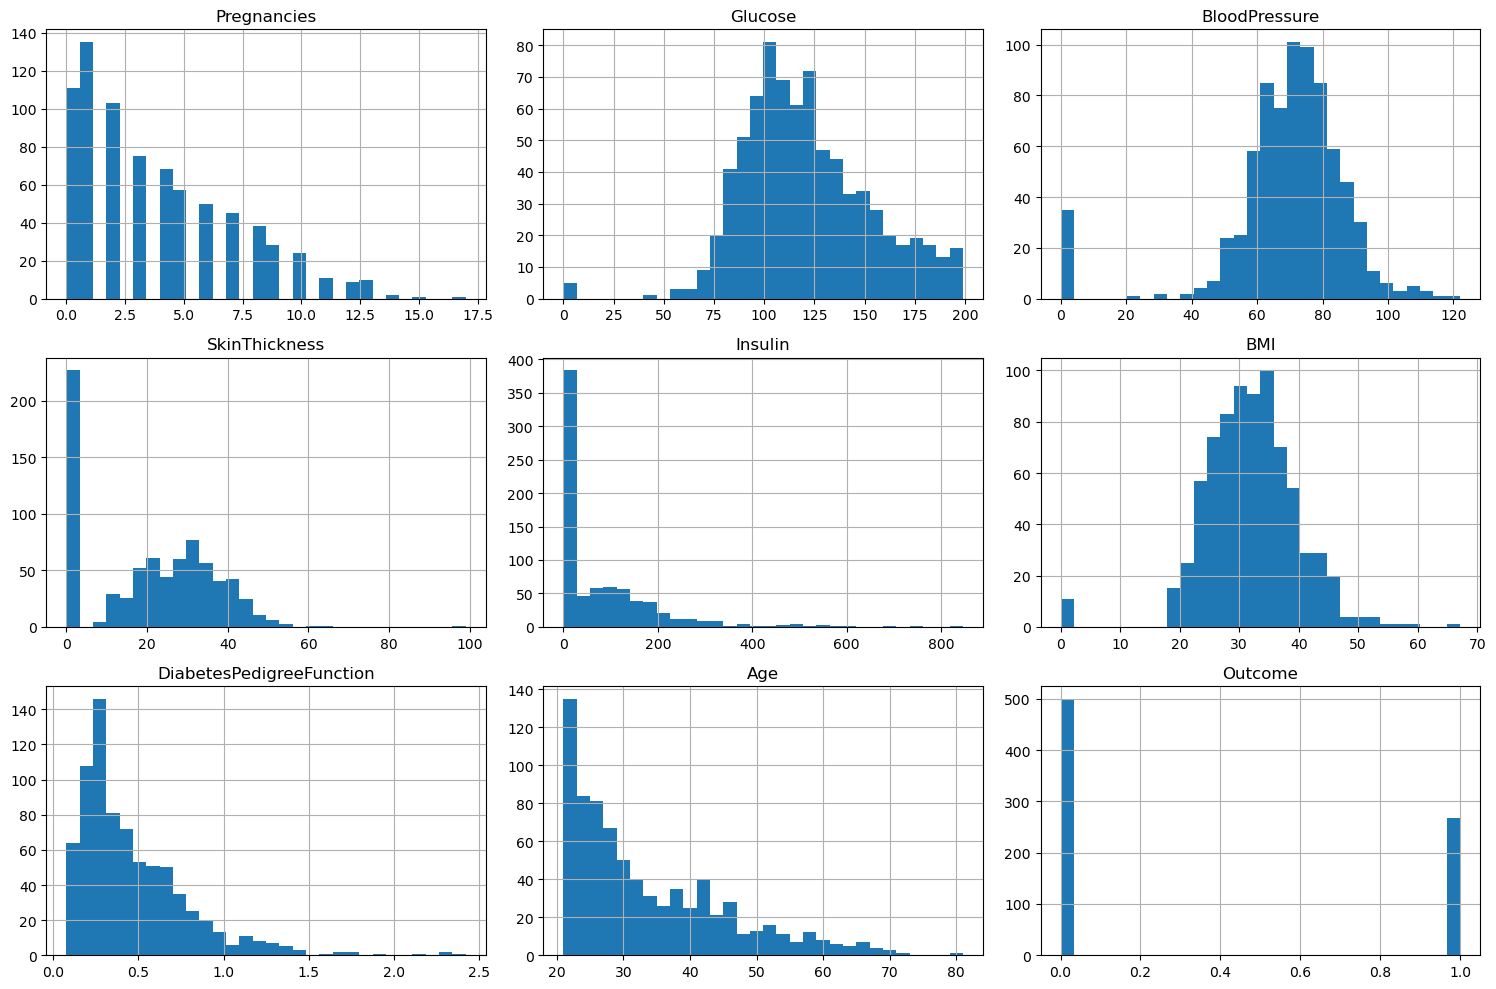

In [48]:
# Plotting histograms for each column 
df.hist(bins = 30, figsize=(15,10))
plt.tight_layout()
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

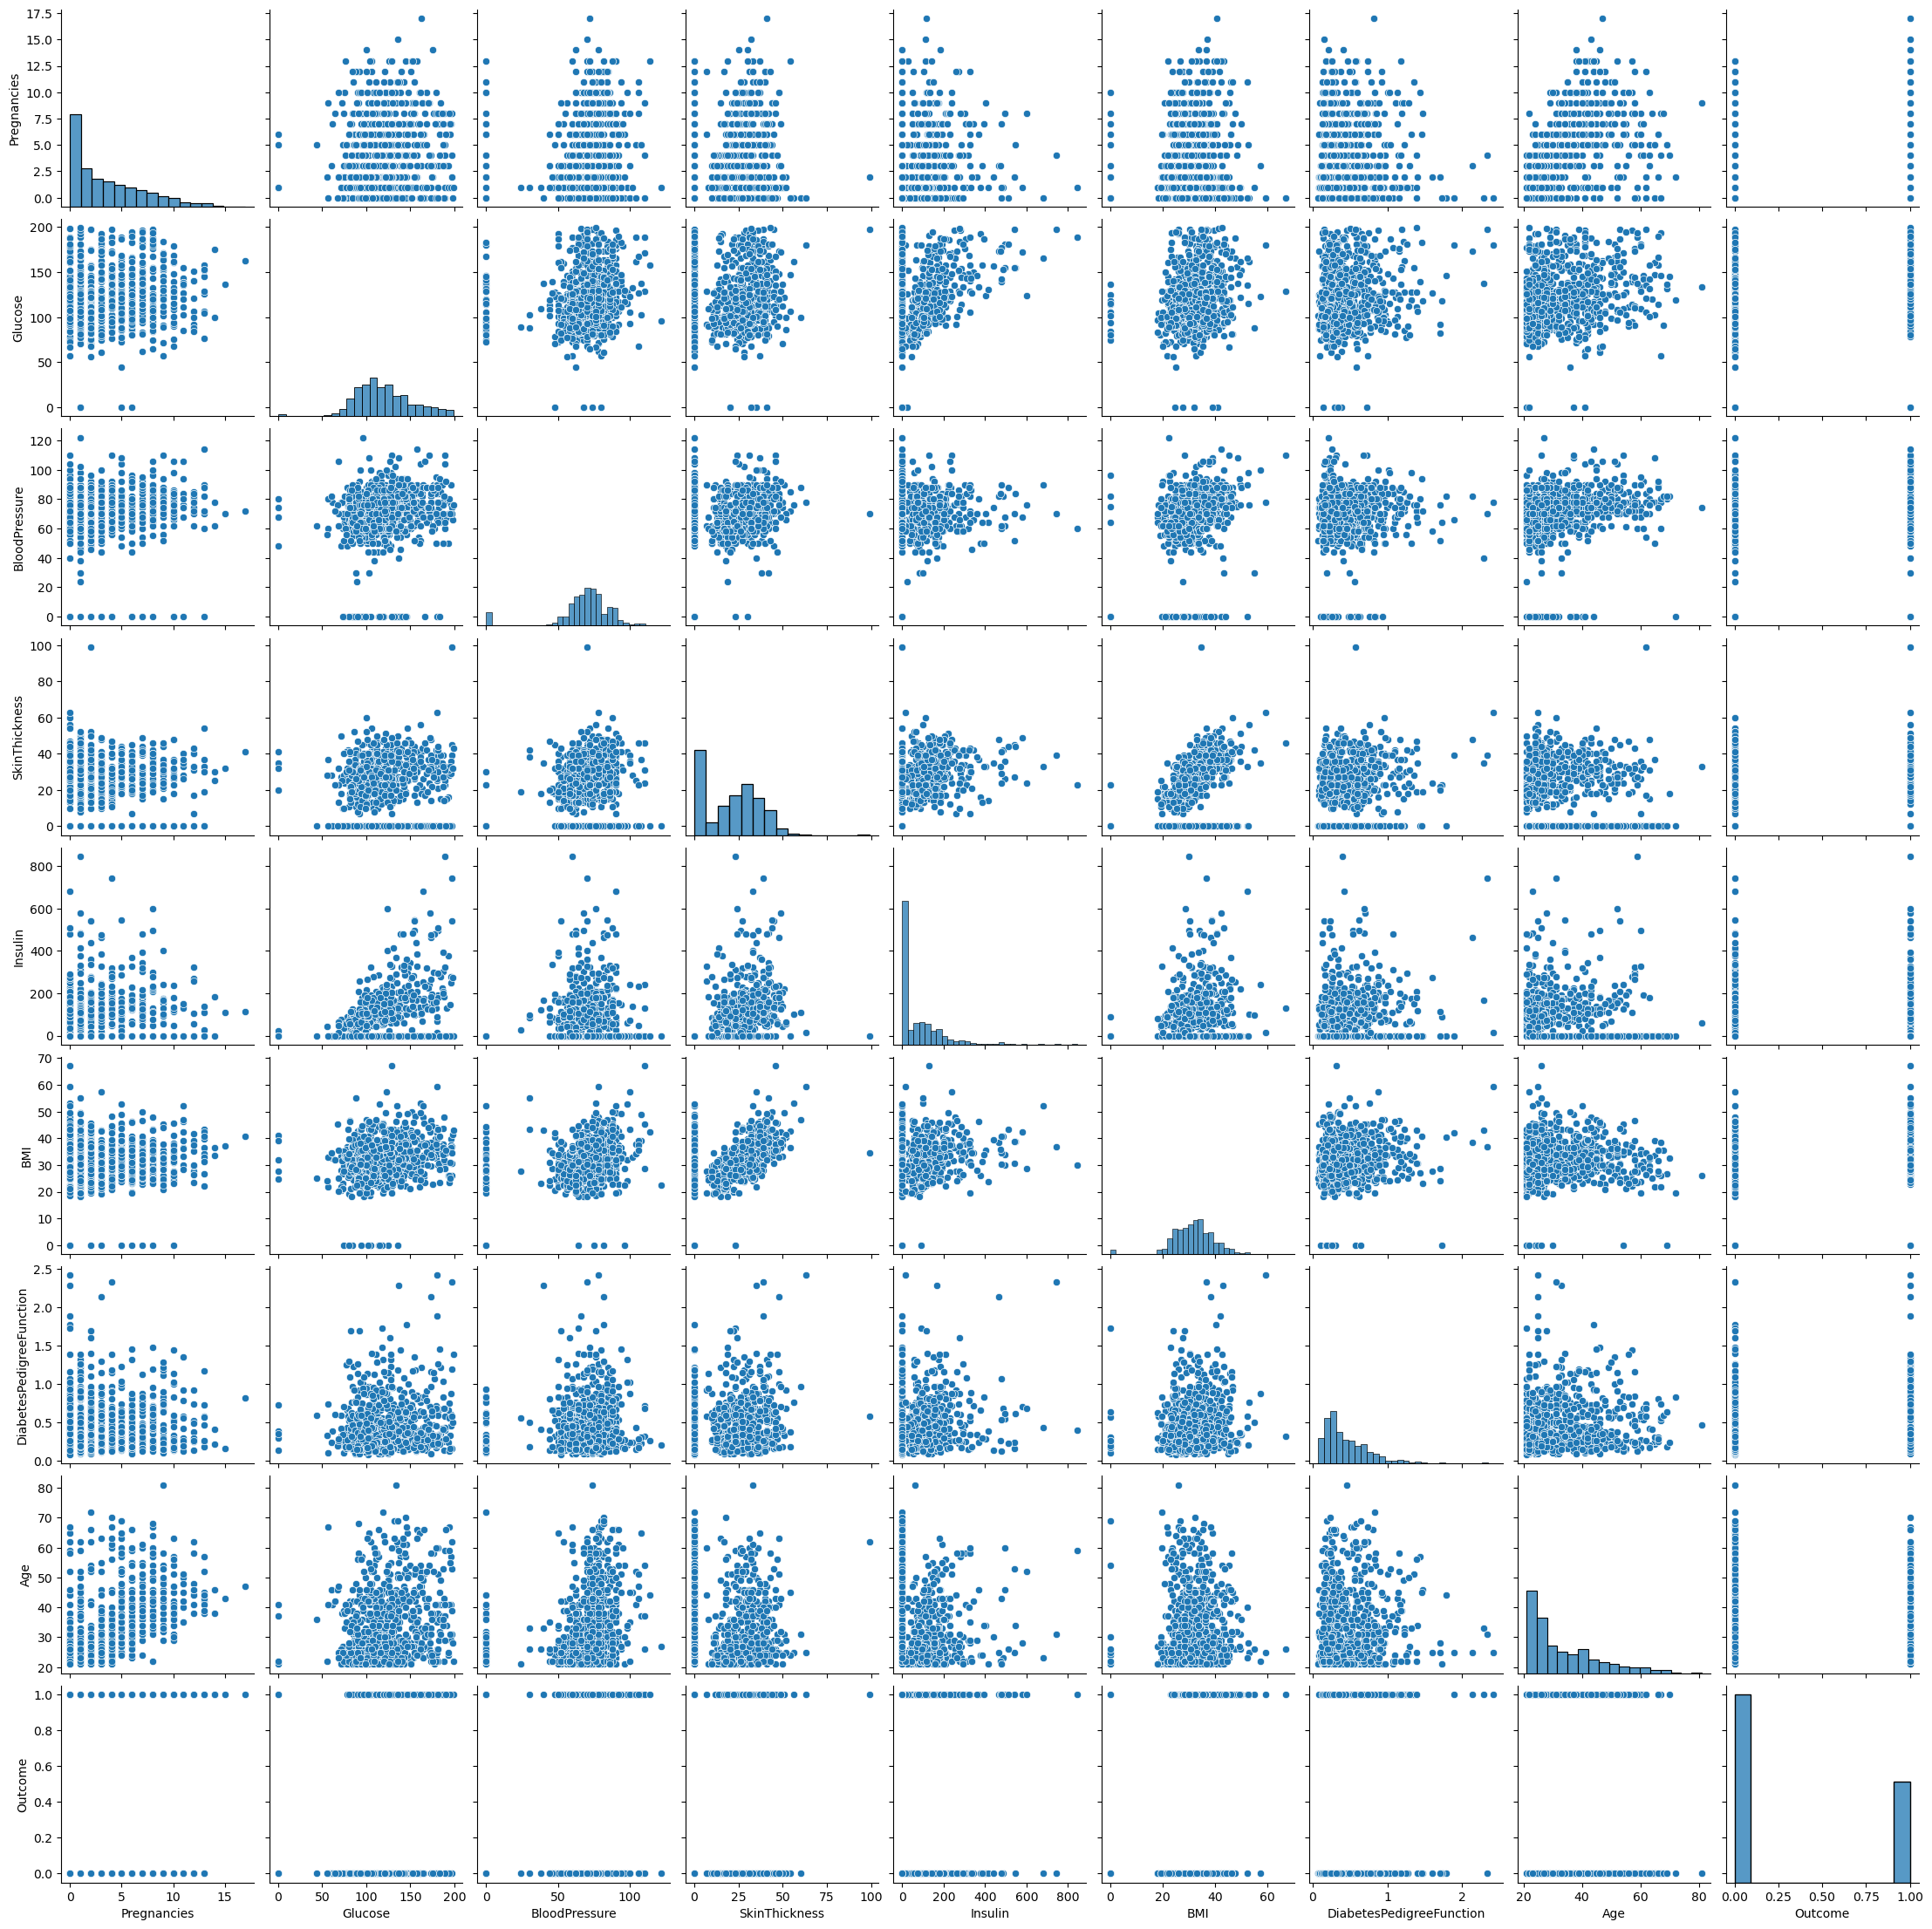

In [55]:
# Creating a pairwise scatter plot matrix
sns.pairplot(df)
plt.show()

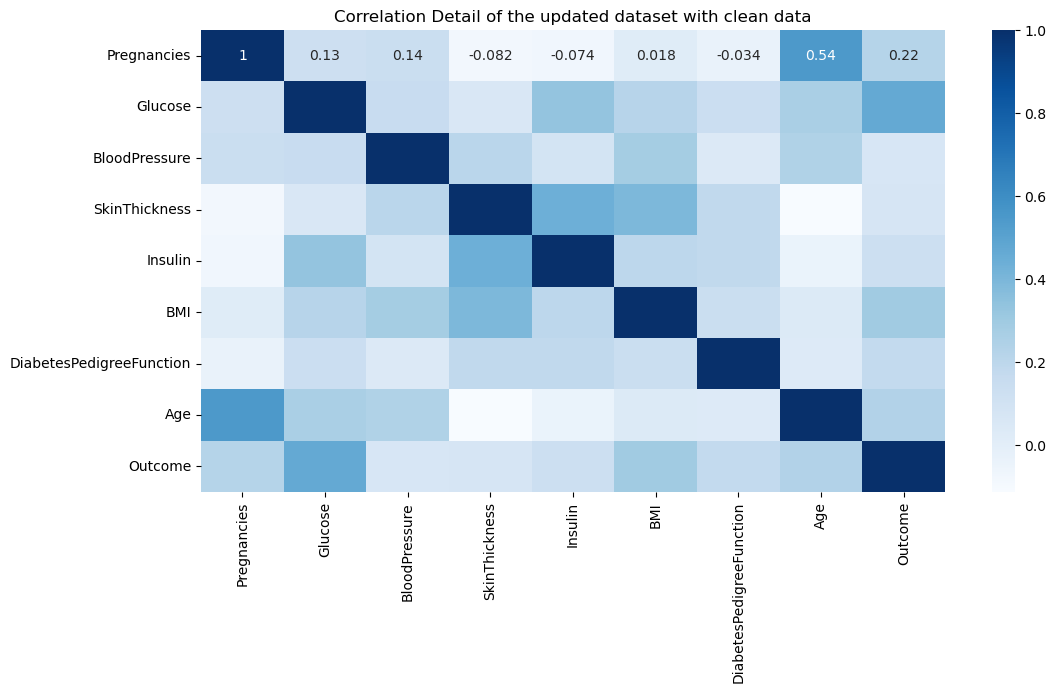

In [86]:
# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='Blues', annot=True)
plt.title('Correlation Detail of the updated dataset with clean data')
plt.show()

# Statistical Analysis

In [87]:
# Generating descriptive statistics for numerical columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
# Calculating the variance for each column
variance = df.var()
print(variance)

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64


# Box Plot For Outliers

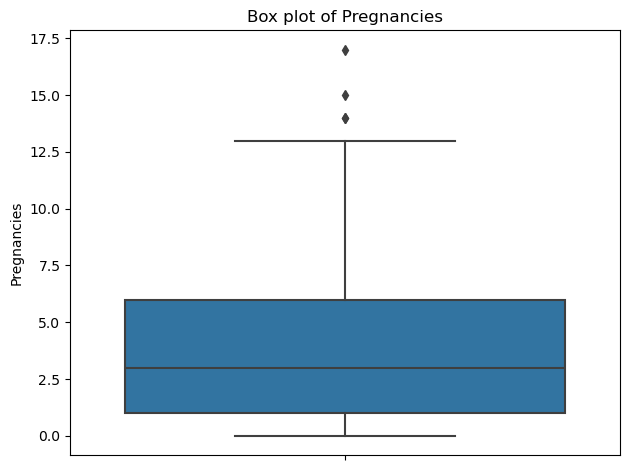

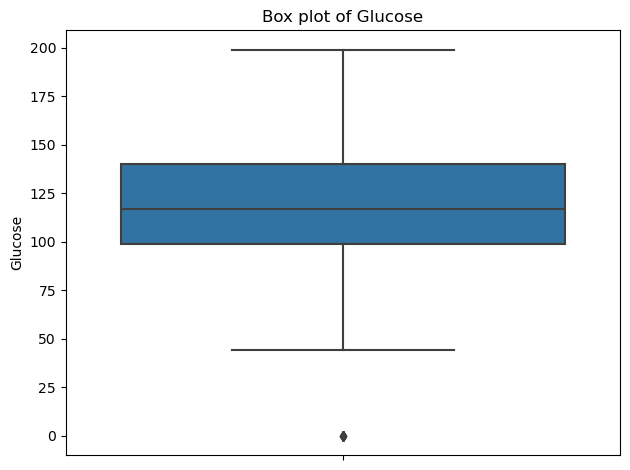

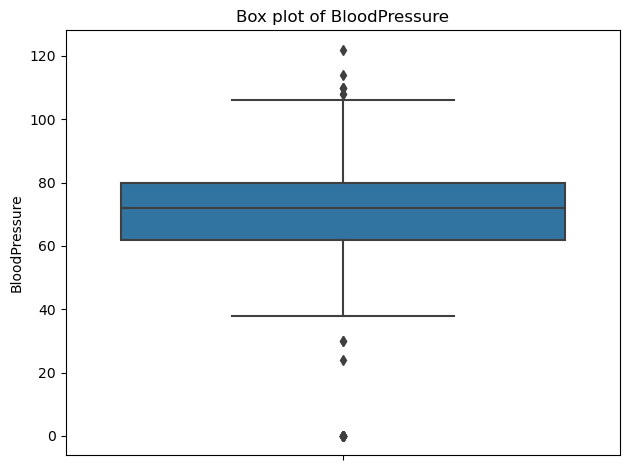

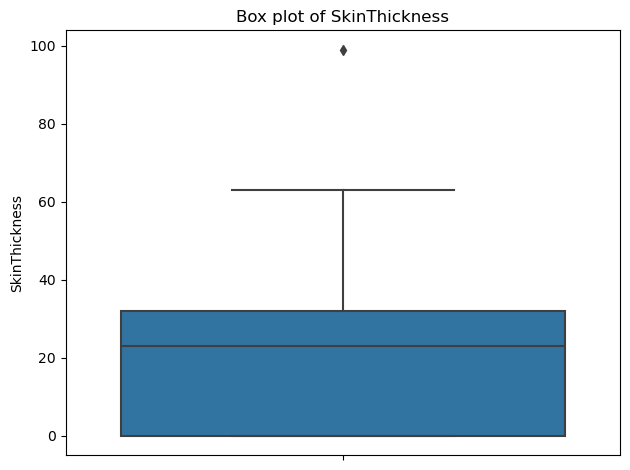

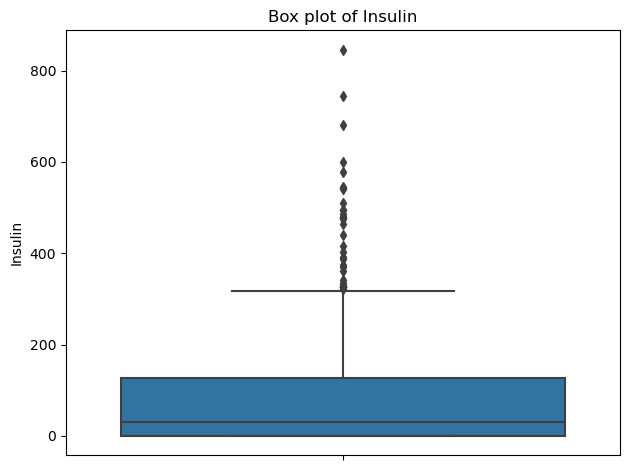

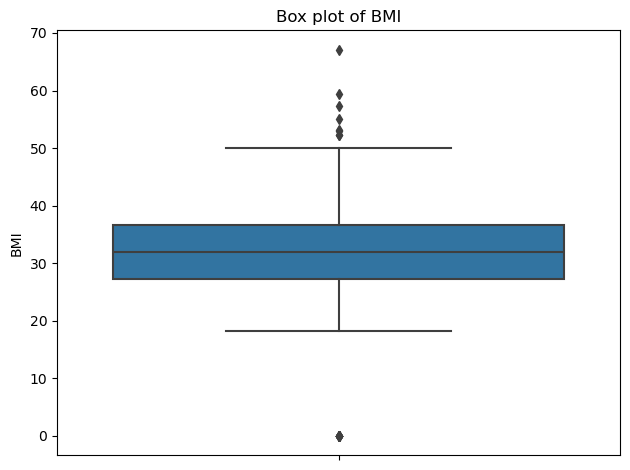

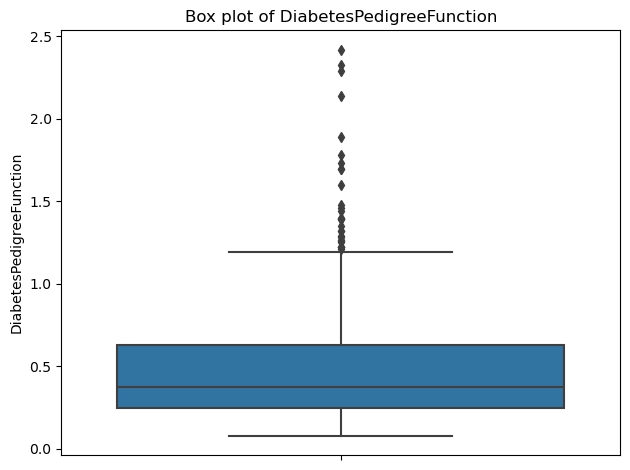

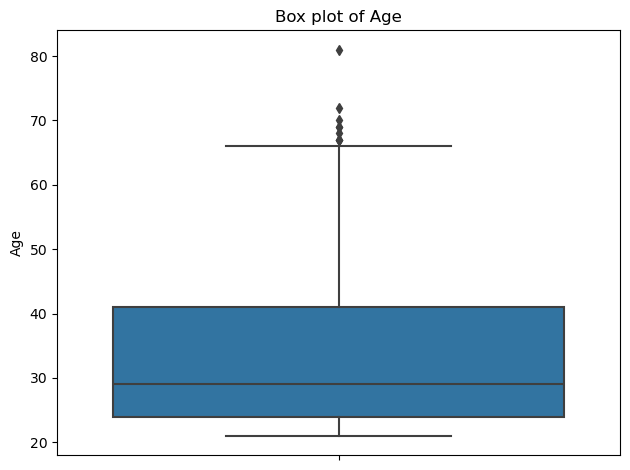

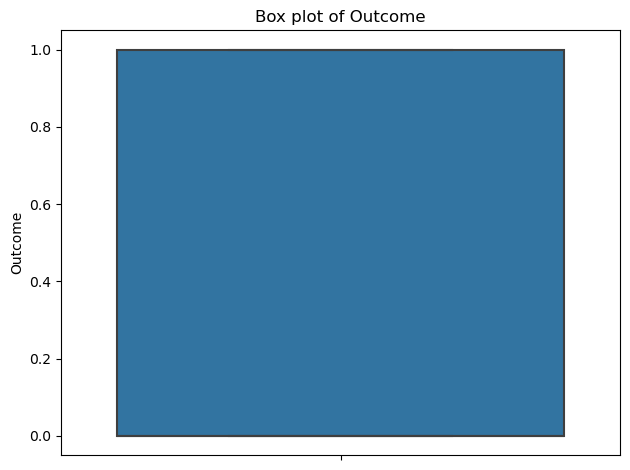

In [89]:
for column in df.columns:
    plt.figure()
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()
    plt.show()

In [92]:
# Function to remove outliers based on IQR and plot box plots
def remove_outliers_and_boxplot(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df_filtered[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()
    plt.show()
    
    return df_filtered

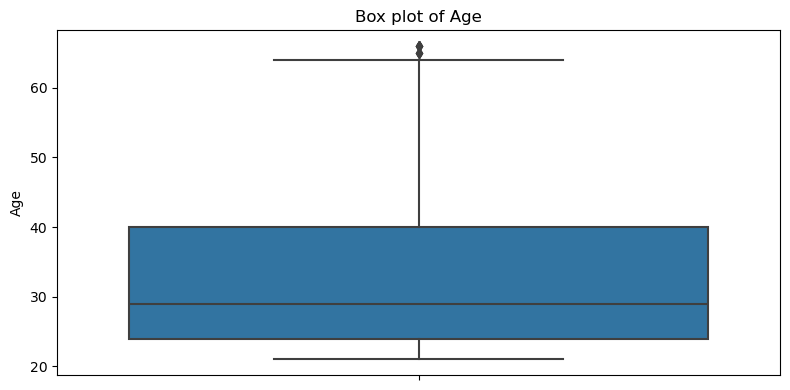

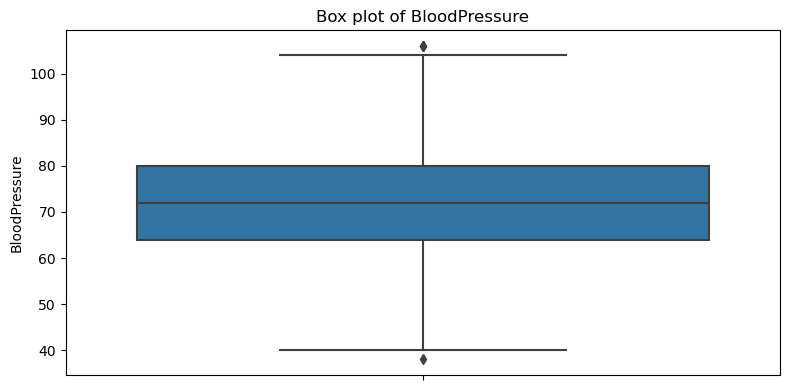

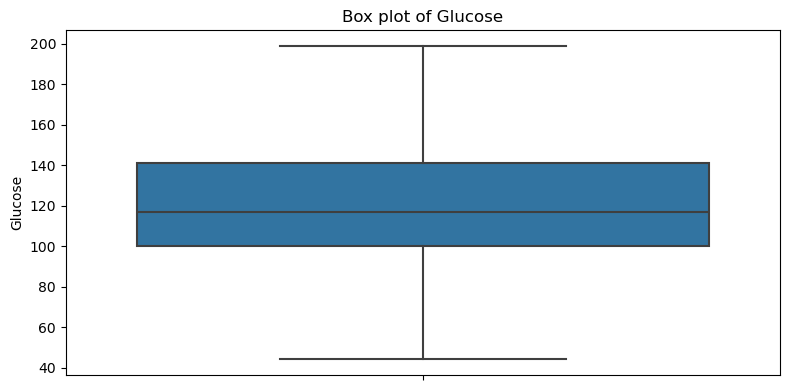

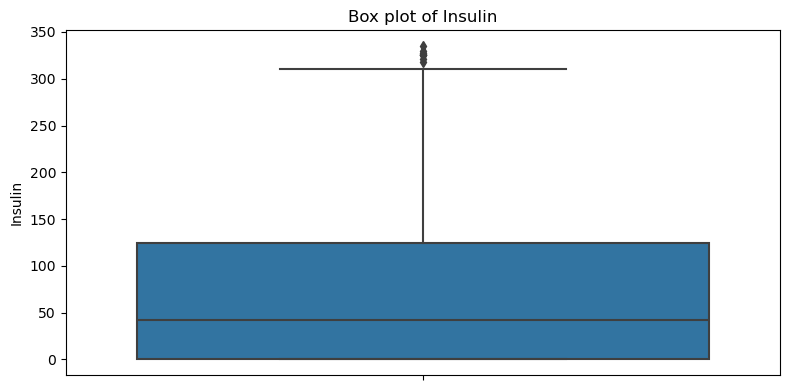

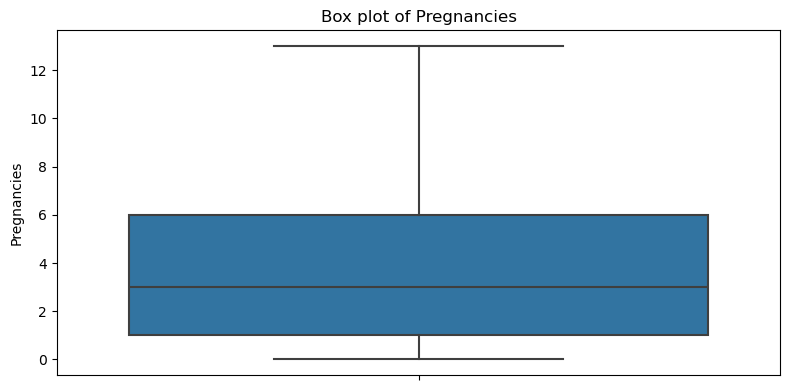

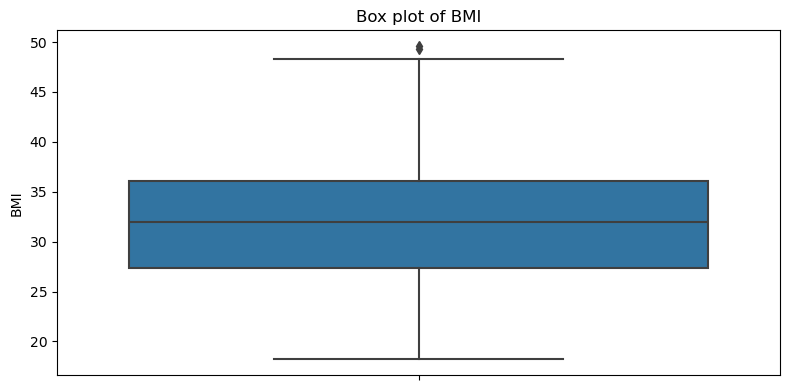

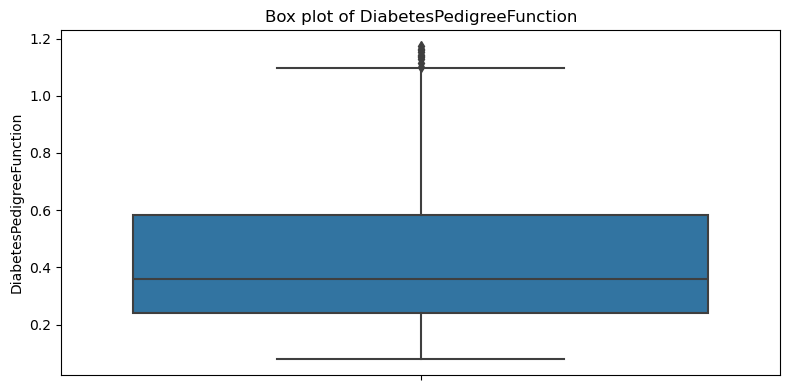

In [93]:
# Assuming df is your DataFrame with columns like 'Age', 'BloodPressure', etc.
columns_to_process = ['Age', 'BloodPressure', 'Glucose', 'Insulin', 'Pregnancies', 'BMI', 'DiabetesPedigreeFunction']

for column in columns_to_process:
    df = remove_outliers_and_boxplot(df, column)


# Data Selection and Algorithm Selection


In [101]:
# Prepare features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [102]:
# X_train and y_train will be used for training the model
# X_test and y_test will be used for evaluating its performance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Printing the shapes of the training and testing sets.
print('X_Train: ',X_train.shape ,' AND Y_Train: ',y_train.shape)
print('X_Test: ',X_test.shape , ' AND Y_Test: ',y_test.shape)

X_Train:  (514, 8)  AND Y_Train:  (514,)
X_Test:  (129, 8)  AND Y_Test:  (129,)


# MACHINE LEARNING ALGORITHMS

In [104]:
# create instances of machine learning algorithms classes

logistic = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=10)
random_forest = RandomForestClassifier()
gradient_boost = GradientBoostingClassifier()

In [105]:
# Function to Evaluates a machine learning model's performanc

def models(model):
    # Print model information
    print("Evaluating Model Name :", model)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    prediction = model.predict(X_test)

    # Evaluate model performance using various metrics

    # Accuracy: Proportion of correct predictions
    accuracy = accuracy_score(prediction, y_test)
    print("Accuracy Score :", accuracy)

    # Recall: Proportion of true positives correctly identified
    recall = recall_score(prediction, y_test)
    print("Recall Score :", recall)

    # F1 Score: Harmonic mean of precision and recall
    f1 = f1_score(prediction, y_test)
    print("F1 Score :", f1)
    sns.heatmap(confusion_matrix(prediction, y_test), annot=True ,fmt = '0.2f',linewidth = .9)

# LOGISTIC REGRESSION

Evaluating Model Name : LogisticRegression()
Accuracy Score : 0.751937984496124
Recall Score : 0.7619047619047619
F1 Score : 0.5


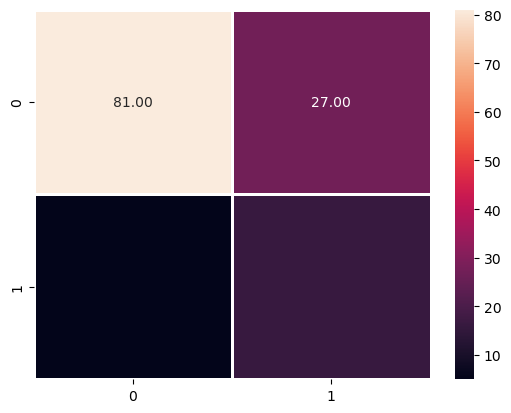

In [106]:
models(logistic)

# KNeighbors Classifier

Evaluating Model Name : KNeighborsClassifier(n_neighbors=10)
Accuracy Score : 0.751937984496124
Recall Score : 0.8235294117647058
F1 Score : 0.46666666666666673


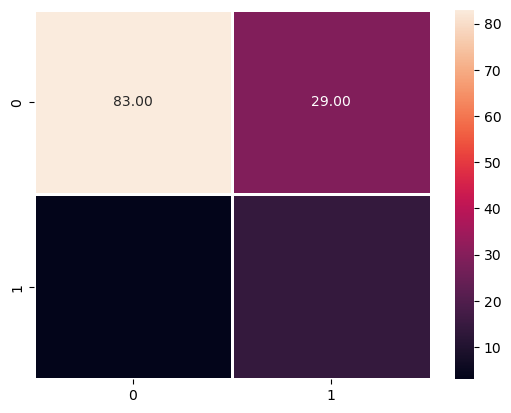

In [107]:
models(knn)

# Random Forest Classifier

Evaluating Model Name : RandomForestClassifier()
Accuracy Score : 0.7829457364341085
Recall Score : 0.8571428571428571
F1 Score : 0.5625000000000001


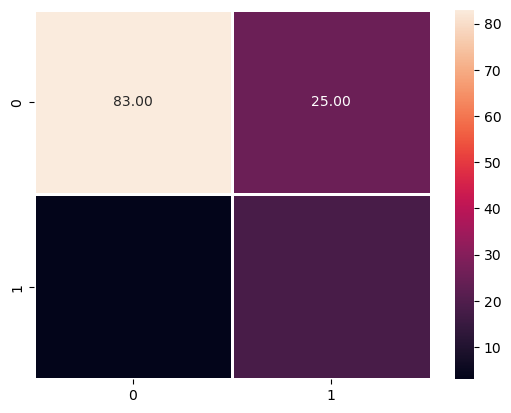

In [108]:
models(random_forest)

# Gradient Boosting Classifier

Evaluating Model Name : GradientBoostingClassifier()
Accuracy Score : 0.7596899224806202
Recall Score : 0.7
F1 Score : 0.5753424657534246


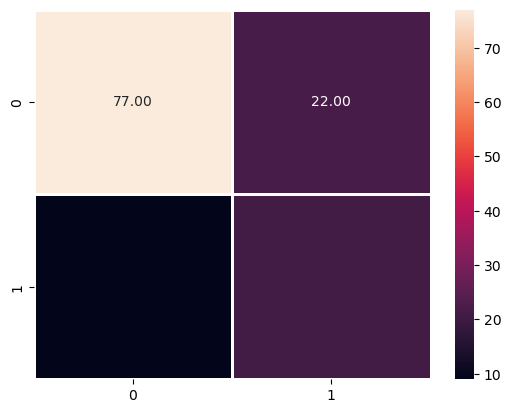

In [109]:
models(gradient_boost)

# Model Training (Decision Tree Classifier Model)

In [121]:
# Creating a Decision Tree Classifier model 
c_model = DecisionTreeClassifier(random_state= 50)
c_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

In [122]:
predicted = c_model.predict(X_test)

In [123]:
# Calculating and print the accuracy score
print('Accuracy Score of the model is: ', accuracy_score(y_test, predicted))

Accuracy Score of the model is:  0.751937984496124


In [124]:
# Generating and printing the classification report for the model's predictions
print("Classification Model's Report: ", classification_report(y_test, predicted))

Classification Model's Report:                precision    recall  f1-score   support

           0       0.79      0.86      0.82        86
           1       0.66      0.53      0.59        43

    accuracy                           0.75       129
   macro avg       0.72      0.70      0.71       129
weighted avg       0.74      0.75      0.74       129



In [125]:
# Calculating the ROC AUC score using the 'ovo' (one-vs-one) strategy for multiclass classification.
print(roc_auc_score(y_test, predicted, multi_class='ovo'))

0.6976744186046511


# Hyper Parameter Tuning

In [131]:
param_grids = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=50),
                           param_grid=param_grids,
                           scoring="accuracy",
                           cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

predicted_best = best_model.predict(X_test)

print("Accuracy score is:")
print(accuracy_score(y_test, predicted_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted_best))
print("\nClassification Report:")
print(classification_report(y_test, predicted_best))
print("ROC AUC Score:")
print(roc_auc_score(y_test, predicted_best, multi_class='ovo'))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Accuracy score is:
0.7364341085271318
Confusion Matrix:
[[79  7]
 [27 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.82        86
           1       0.70      0.37      0.48        43

    accuracy                           0.74       129
   macro avg       0.72      0.65      0.65       129
weighted avg       0.73      0.74      0.71       129

ROC AUC Score:
0.6453488372093024


# Cross-Validation (K-Fold Cross Validation)

In [127]:
dtc_cv = DecisionTreeClassifier(random_state=42)

k = 5
cv_scores = cross_val_score(dtc_cv, X, y, cv=k, scoring='accuracy')


print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.75193798 0.64341085 0.74418605 0.75       0.65625   ]
Mean CV Score: 0.7091569767441861


# Model Interpretation

In [128]:
importances = best_model.feature_importances_
features = df.columns
indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in indices]

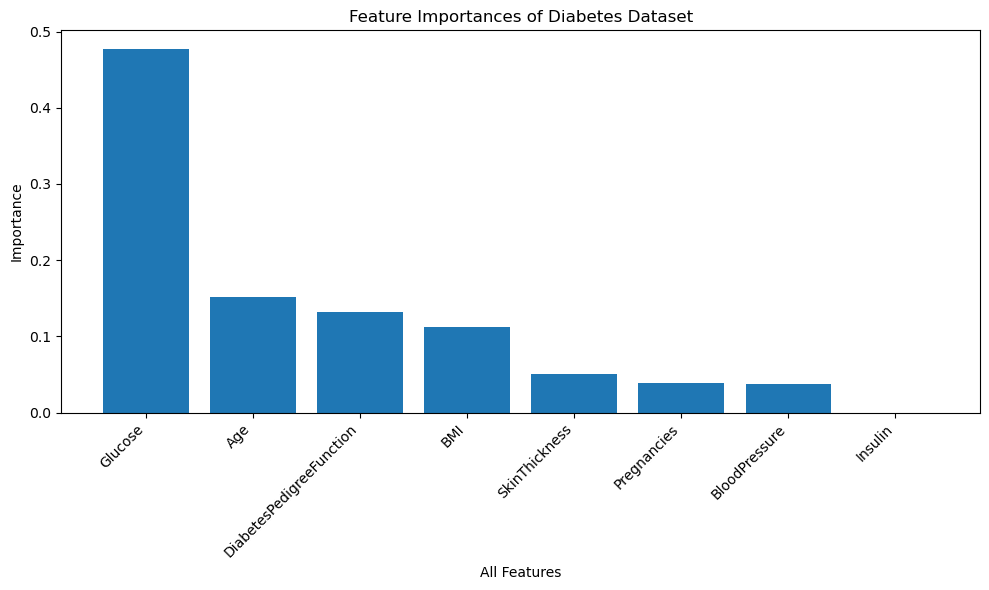

In [129]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances of Diabetes Dataset")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), sorted_features, rotation=45, ha='right')
plt.xlabel("All Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# The End